3555578                           slurm.cmd     FAILED 

3555579                    slurm_wo_q95.cmd     FAILED 

3555580                     slurm_wo_li.cmd     FAILED 

3555581                     slurm_wo_ip.cmd     FAILED 

3555582                 slurm_wo_energy.cmd     FAILED 

3555583                     slurm_wo_lm.cmd     FAILED 

3555584                   slurm_wo_dens.cmd     FAILED 

3555585               slurm_wo_pradcore.cmd     FAILED 

3555586               slurm_wo_pradedge.cmd     FAILED 

3555587                slurm_wo_pradtot.cmd     FAILED 

3555588                    slurm_wo_pin.cmd     FAILED 




3555589               slurm_wo_energydt.cmd  COMPLETED 

3555589.bat+                          batch  COMPLETED 

3555589.ext+                         extern  COMPLETED 

3555589.0                            python  COMPLETED 

validate: 1424 shots, 89 disruptive

training: 2894 shots, 216 disruptive

testing: 1184 shots, 174 disruptive


## Gather output files

In [1]:
import glob
import ast 
import os
import numpy as np
from shutil import copyfile
import matplotlib.pyplot as plt

In [2]:
all_sigs = ['q95', 'li', 'ip', 'energy', 'lm', 'dens', 'pradcore', 'pradedge', 'pradtot', 'pin', 'energydt']

In [3]:
all_sigs_dict = {'all': 'All 11 0D signals',
                'dens': 'Plasma density',
                'energy': 'stored energy',
                'energydt': 'stored energy time derivative',
                'ip': 'plasma current',
                'li': 'internal inductance',
                'lm': 'Locked mode amplitude',
                'pin': 'Input Power',
                'pradcore': 'Radiated Power Core',
                'pradedge': 'Radiated Power Edge',
                'pradtot': 'Radiated Power',
                'q95': 'q95 safety factor'
                }

In [4]:
num_epochs = 4
num_gpu = 4
outdir = '/home/wvdp/PPPLDeepLearning/myexamples/Output/'

In [5]:
out_list = glob.glob('/home/wvdp/PPPLDeepLearning/slurm/MySlurms/*.out')

In [6]:
missing_list = []
rocs = np.zeros((len(out_list), num_epochs, num_gpu))
train_loss = np.ones((len(out_list), num_epochs, num_gpu))
val_loss = np.ones((len(out_list), num_epochs, num_gpu))

for i,out_file in enumerate(out_list): 
    
    sig_finder = False
    epoch_number = -1

    with open(out_file, "r") as ifile:
        for line in ifile:
            # Find the signal excluded in this out file
            if line.startswith("Wouter") and not sig_finder:
                literal = line.split('Wouter')[1].strip()
                sigs_included = ast.literal_eval(literal)
                sig_excluded = list((set(all_sigs) - set(sigs_included)))
                if len(sig_excluded)==1:
                    missing_list.append(sig_excluded[0])
                else:
                    missing_list.append('all')
                print(sig_excluded)
                sig_finder = True
            # Find the current epoch number:
            if line.startswith('Epoch'):
                if line.endswith('seconds.\n'):
                    epoch_number_new = round(float(line.split(' ')[1]))
                    if epoch_number != epoch_number_new:
                        epoch_number = epoch_number_new
                        gpu_counter = 0
            # Find the summary info:
            if line.startswith('Training Loss numpy'):
                train_loss[i][epoch_number-1][gpu_counter] = line.split()[-1]
            if line.startswith('Validation Loss'):
                val_loss[i][epoch_number-1][gpu_counter] = line.split()[-1]
            if line.startswith('Validation ROC'):
                rocs[i][epoch_number-1][gpu_counter] = line.split()[-1]
                print('Epoch: {}, GPU: {} Val ROC: {}, Val loss: {}, Train loss: {}'.format(
                                                                     epoch_number, 
                                                                     gpu_counter, 
                                                                     line.split()[-1],
                                                                     val_loss[i][epoch_number-1][gpu_counter], 
                                                                     train_loss[i][epoch_number-1][gpu_counter])
                     )
                gpu_counter +=1 
            if line.startswith('Test ROC'):
                print(line)
            # Store the actual step info 
    print()

[]
Epoch: 1, GPU: 0 Val ROC: 0.6299, Val loss: 0.01489, Train loss: 0.1967
Epoch: 1, GPU: 1 Val ROC: 0.6239, Val loss: 0.01491, Train loss: 0.1967
Epoch: 1, GPU: 2 Val ROC: 0.6249, Val loss: 0.01504, Train loss: 0.1968
Epoch: 1, GPU: 3 Val ROC: 0.6149, Val loss: 0.01489, Train loss: 0.1968
Epoch: 2, GPU: 0 Val ROC: 0.6218, Val loss: 0.01571, Train loss: 0.0466
Epoch: 2, GPU: 1 Val ROC: 0.5018, Val loss: 0.01473, Train loss: 0.04644
Epoch: 2, GPU: 2 Val ROC: 0.5986, Val loss: 0.01612, Train loss: 0.04657
Epoch: 2, GPU: 3 Val ROC: 0.6526, Val loss: 0.016, Train loss: 0.0468
Epoch: 3, GPU: 0 Val ROC: 0.7088, Val loss: 0.01514, Train loss: 0.01003
Epoch: 3, GPU: 1 Val ROC: 0.3058, Val loss: 0.02247, Train loss: 0.01022
Epoch: 4, GPU: 0 Val ROC: 0.7535, Val loss: 0.01545, Train loss: 0.006832
Epoch: 4, GPU: 1 Val ROC: 0.6527, Val loss: 0.01506, Train loss: 0.007035
Test ROC: 0.8472


['q95']
Epoch: 1, GPU: 0 Val ROC: 0.4130, Val loss: 0.01547, Train loss: 0.1988
Epoch: 1, GPU: 1 Val ROC: 0.

Epoch: 2, GPU: 0 Val ROC: 0.6410, Val loss: 0.01629, Train loss: 0.04666
Epoch: 2, GPU: 1 Val ROC: 0.5877, Val loss: 0.01544, Train loss: 0.04676
Epoch: 2, GPU: 2 Val ROC: 0.5399, Val loss: 0.01621, Train loss: 0.04667
Epoch: 2, GPU: 3 Val ROC: 0.6694, Val loss: 0.01702, Train loss: 0.04656
Epoch: 3, GPU: 0 Val ROC: 0.8437, Val loss: 0.0139, Train loss: 0.01043
Epoch: 3, GPU: 1 Val ROC: 0.8122, Val loss: 0.01434, Train loss: 0.009997
Epoch: 4, GPU: 0 Val ROC: 0.8098, Val loss: 0.01434, Train loss: 0.006804
Epoch: 4, GPU: 1 Val ROC: 0.7566, Val loss: 0.01418, Train loss: 0.006742
Test ROC: 0.9303


['pradtot']
Epoch: 1, GPU: 0 Val ROC: 0.6021, Val loss: 0.0168, Train loss: 0.1965
Epoch: 1, GPU: 1 Val ROC: 0.6283, Val loss: 0.01484, Train loss: 0.1965
Epoch: 1, GPU: 2 Val ROC: 0.6352, Val loss: 0.01502, Train loss: 0.1965
Epoch: 1, GPU: 3 Val ROC: 0.5995, Val loss: 0.01582, Train loss: 0.1965
Epoch: 2, GPU: 0 Val ROC: 0.6588, Val loss: 0.01669, Train loss: 0.04658
Epoch: 2, GPU: 1 Val RO

In [7]:
#Cheating:
missing_list[0]='pradcore'
missing_list[7]='all'
missing_list

['pradcore',
 'q95',
 'li',
 'ip',
 'energy',
 'lm',
 'dens',
 'all',
 'pradedge',
 'pradtot',
 'pin',
 'energydt']

pradcore 	 [0.1967   0.04644  0.01003  0.006832]
q95 	 [0.1986  0.04606 0.01004 0.00664]
li 	 [0.1986   0.0463   0.01005  0.006786]
ip 	 [0.197    0.04637  0.01003  0.006851]
energy 	 [0.197    0.04657  0.009971 0.00672 ]
lm 	 [0.1988   0.04605  0.009951 0.006743]
dens 	 [0.1969   0.04634  0.01024  0.006734]
all 	 [0.1968   0.0465   0.009922 0.006896]
pradedge 	 [0.1966   0.04656  0.009997 0.006742]
pradtot 	 [0.1965   0.04646  0.01004  0.006886]
pin 	 [0.1964  0.0465  0.01009 0.00671]
energydt 	 [0.1966   0.04647  0.01009  0.006667]


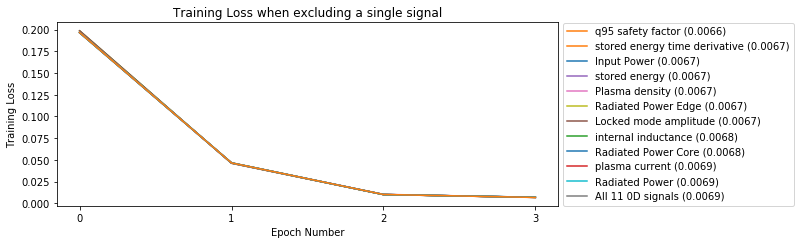

In [8]:
min4_trainloss = []
fig, ax = plt.subplots(figsize=(8,3.5))

for valloss,trainloss, missing in zip(val_loss, train_loss, missing_list):
    ax.plot(range(num_epochs),np.min(trainloss, axis=1),
            label=all_sigs_dict[missing]+' ({:0.4f})'.format(np.min(trainloss, axis=1)[3]))

    min4_trainloss.append(np.min(trainloss, axis=1)[3])
    print(missing,'\t', np.min(trainloss, axis=1))

order = np.argsort(min4_trainloss)
handles, labels = ax.get_legend_handles_labels()
handles2 = np.array(handles)[order]
labels2 = np.array(labels)[order]

ax.legend(handles2, labels2, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Epoch Number')
ax.set_ylabel('Training Loss')
ax.set_title('Training Loss when excluding a single signal')
#ax.set_yscale('log')
ax.set_xticks(range(num_epochs))
fig.tight_layout()
fig.savefig(outdir+'trainloss.png', dpi=300, bbox_inches = 'tight')

pradcore 	 [0.6299 0.6526 0.7088 0.7535]
q95 	 [0.5447 0.7013 0.8301 0.7729]
li 	 [0.7461 0.7801 0.7891 0.8119]
ip 	 [0.6722 0.7179 0.8143 0.7778]
energy 	 [0.6111 0.6251 0.7909 0.8153]
lm 	 [0.5924 0.7585 0.7846 0.7425]
dens 	 [0.6422 0.6407 0.3337 0.8056]
all 	 [0.4779 0.6097 0.7951 0.8295]
pradedge 	 [0.6791 0.6694 0.8437 0.8098]
pradtot 	 [0.6352 0.6588 0.8302 0.8018]
pin 	 [0.6282 0.7025 0.6531 0.7474]
energydt 	 [0.6338 0.6699 0.8405 0.8249]


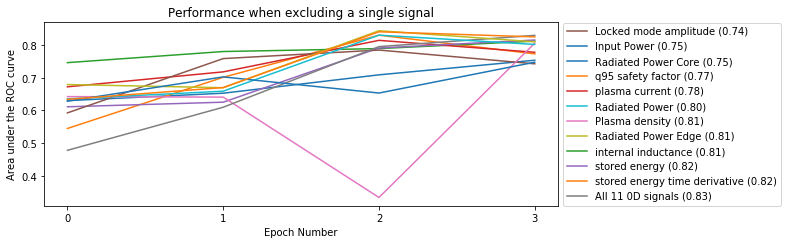

In [9]:
max4_rocs = []
fig, ax = plt.subplots(figsize=(8,3.5))

for roc, missing in zip(rocs, missing_list):
    ax.plot(range(num_epochs),np.max(roc, axis=1),
            label=all_sigs_dict[missing]+' ({:0.2f})'.format(np.max(roc, axis=1)[3]))
    
    print(missing,'\t', np.max(roc, axis=1))
    max4_rocs.append(np.max(roc, axis=1)[3])

order = np.argsort(max4_rocs)
handles, labels = ax.get_legend_handles_labels()
handles2 = np.array(handles)[order]
labels2 = np.array(labels)[order]

ax.legend(handles2, labels2, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Epoch Number')
ax.set_ylabel('Area under the ROC curve')
ax.set_title('Performance when excluding a single signal')
ax.set_xticks(range(num_epochs))
fig.tight_layout()
fig.savefig(outdir+'rocs.png', dpi=300, bbox_inches = 'tight')

## CSV files?

In [9]:
log_list = glob.glob('/tigress/wvdp/csv_logs/*.log')

In [10]:
log_list

['/tigress/wvdp/csv_logs/callbacks-2019-09-04-12-38-14.log',
 '/tigress/wvdp/csv_logs/callbacks-2019-09-04-17-30-51.log',
 '/tigress/wvdp/csv_logs/callbacks-2019-09-04-10-42-38.log',
 '/tigress/wvdp/csv_logs/callbacks-2019-09-04-12-38-12.log',
 '/tigress/wvdp/csv_logs/callbacks-2019-09-04-18-04-52.log',
 '/tigress/wvdp/csv_logs/callbacks-2019-09-04-12-38-11.log',
 '/tigress/wvdp/csv_logs/callbacks-2019-09-04-16-57-05.log',
 '/tigress/wvdp/csv_logs/callbacks-2019-09-04-15-54-57.log']

In [11]:
for i, log_file in enumerate(log_list): 
    with open(log_file, "r") as ifile:
        for line in ifile:
            if line.startswith('3,'):
                print(log_file.split('/')[-1],'Validation ROC after epoch 3: ', line.split(',')[-1])
            # Find the signal excluded in this out file

callbacks-2019-09-04-17-30-51.log Validation ROC after epoch 3:  0.6646046374615999

callbacks-2019-09-04-12-38-12.log Validation ROC after epoch 3:  0.7729327105163488

callbacks-2019-09-04-18-04-52.log Validation ROC after epoch 3:  0.5762487901359257

callbacks-2019-09-04-15-54-57.log Validation ROC after epoch 3:  0.8056137693052225



## NPZ results

In [12]:
npz_list = glob.glob('/tigress/wvdp/results/*.npz')

In [13]:
file = np.load(npz_list[0], allow_pickle=True)

In [14]:
file.__dict__

{'_files': ['y_gold.npy',
  'y_gold_train.npy',
  'y_gold_test.npy',
  'y_prime.npy',
  'y_prime_train.npy',
  'y_prime_test.npy',
  'disruptive.npy',
  'disruptive_train.npy',
  'disruptive_test.npy',
  'shot_list_train.npy',
  'shot_list_test.npy',
  'conf.npy'],
 'files': ['y_gold',
  'y_gold_train',
  'y_gold_test',
  'y_prime',
  'y_prime_train',
  'y_prime_test',
  'disruptive',
  'disruptive_train',
  'disruptive_test',
  'shot_list_train',
  'shot_list_test',
  'conf'],
 'allow_pickle': True,
 'pickle_kwargs': {'encoding': 'ASCII', 'fix_imports': True},
 'zip': <zipfile.ZipFile file=<_io.BufferedReader name='/tigress/wvdp/results/results_2019-09-04-14-48-33.npz'> mode='r'>,
 'f': <numpy.lib.npyio.BagObj at 0x2ad1bf385128>,
 'fid': <_io.BufferedReader name='/tigress/wvdp/results/results_2019-09-04-14-48-33.npz'>}

In [15]:
file['conf'].item(0)['paths']['specific_signals']

all signals (determines which signals are downloaded and preprocessed):
dict_values([q95 safety factor, internal inductance, plasma current, Normalized Beta, stored energy, Locked mode amplitude, Plasma density, Radiated Power Core, Radiated Power Edge, Radiated Power, Input Power (beam for d3d), Input Beam Torque, stored energy time derivative, plasma current direction, plasma current target, plasma current error, Electron temperature profile, Electron density profile])


Using TensorFlow backend.


['q95',
 'li',
 'ip',
 'energy',
 'lm',
 'dens',
 'pradcore',
 'pradedge',
 'pradtot',
 'pin',
 'energydt']

In [21]:
for npz_file in npz_list:
    file = np.load(npz_file, allow_pickle=True)
    sigs_included = file['conf'].item(0)['paths']['specific_signals']
    sig_excluded = list((set(all_sigs) - set(sigs_included)))
    if len(sig_excluded)==1:
        missing_list.append(sig_excluded[0])
    else:
        missing_list.append('all')
    
    directory = '/tigress/wvdp/results/'+missing_list[-1]
    if not os.path.exists(directory):
        os.makedirs(directory)
    copyfile(npz_file, directory+'/'+npz_file.split('/')[-1])
    print(npz_file.split('/')[-1],'\t',sig_excluded)

results_2019-09-04-14-48-33.npz 	 []
results_2019-09-04-17-14-11.npz 	 ['li']
results_2019-09-04-17-28-42.npz 	 ['lm']
results_2019-09-04-23-40-13.npz 	 ['energydt']
results_2019-09-04-21-21-36.npz 	 ['pradedge']
results_2019-09-04-17-28-46.npz 	 ['q95']
results_2019-09-04-19-01-16.npz 	 ['dens']
results_2019-09-04-21-54-30.npz 	 ['pradcore']
results_2019-09-04-21-49-28.npz 	 ['pradtot']
results_2019-09-04-21-08-05.npz 	 ['pin']
results_2019-09-04-17-25-28.npz 	 ['energy']
results_2019-09-04-17-25-10.npz 	 ['energy']
results_2019-09-04-17-14-17.npz 	 ['li']
results_2019-09-04-17-28-51.npz 	 ['ip']
results_2019-09-04-21-54-29.npz 	 ['pradcore']


In [ ]:
for sig in signals_to_modify:  
    directory += '/'+sig.replace(" ", "")
    if not os.path.exists(directory):
        os.makedirs(directory)